In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Earth Shtuff

In [ ]:
# pressure data
# dates 1 Jan 1960 - 30 Nov 2023
columns = ["SOUID", "DATE", "PP (hPa)", "Q_PP"]
pressure_data = []

with open("PP_STAID001860.txt") as f:
    lines = f.readlines()


    for line in lines[20:]:
        row = line.strip().split(",")
        row[-1] = row[-1].strip()

        # change to one decimal place
        row[-2] = round(int(row[-2]) * 0.1, 1)

        pressure_data.append(row)
pressure_data = np.array(pressure_data)

pressure_df = pd.DataFrame(data=pressure_data, columns=columns)

In [ ]:
display(pressure_df)

,SOUID,DATE,PP (hPa),Q_PP
0,116437,19600101,1001.0,0
1,116437,19600102,1005.1,0
2,116437,19600103,1016.6,0
3,116437,19600104,1023.0,0
4,116437,19600105,1027.5,0
...,...,...,...,...
23340,116437,20231126,1015.3,0
23341,116437,20231127,1000.7,0
23342,116437,20231128,1009.4,0
23343,116437,20231129,1005.1,0


In [ ]:
print(pressure_df["Q_PP"].value_counts())

0    23329
9       16
Name: Q_PP, dtype: int64


In [ ]:
pressure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23345 entries, 0 to 23344
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SOUID     23345 non-null  object
 1   DATE      23345 non-null  object
 2   PP (hPa)  23345 non-null  object
 3   Q_PP      23345 non-null  object
dtypes: object(4)
memory usage: 729.7+ KB


In [ ]:
# max temp data
# dates 1 Jan 1959 - 30 Nov 2023
columns = ["SOUID", "DATE", "T_max (C)", "Q_T_max"]
t_max_data = []

with open("TX_STAID001860.txt") as f:
    lines = f.readlines()


    for line in lines[20:]:
        row = line.strip().split(",")
        row[-1] = row[-1].strip()

        # change to one decimal place
        row[-2] = round(int(row[-2]) * 0.1, 1)

        t_max_data.append(row)
t_max_data = np.array(t_max_data)

t_max_df = pd.DataFrame(data=t_max_data, columns=columns)

In [ ]:
display(t_max_df)

,SOUID,DATE,T_max (C),Q_T_max
0,105838,19591201,-999.9,9
1,105838,19591202,-999.9,9
2,105838,19591203,-999.9,9
3,105838,19591204,-999.9,9
4,105838,19591205,-999.9,9
...,...,...,...,...
23371,105838,20231126,10.0,0
23372,105838,20231127,8.0,0
23373,105838,20231128,7.6,0
23374,105838,20231129,4.2,1


In [ ]:
print(t_max_df["Q_T_max"].value_counts())

0    21694
1     1652
9       30
Name: Q_T_max, dtype: int64


In [ ]:
# min temp data
# dates 1 Jan 1959 - 30 Nov 2023
columns = ["SOUID", "DATE", "T_min (C)", "Q_T_min"]
t_min_data = []

with open("TN_STAID001860.txt") as f:
    lines = f.readlines()


    for line in lines[20:]:
        row = line.strip().split(",")
        row[-1] = row[-1].strip()

        # change to one decimal place
        row[-2] = round(int(row[-2]) * 0.1, 1)

        t_min_data.append(row)
t_min_data = np.array(t_min_data)

t_min_df = pd.DataFrame(data=t_min_data, columns=columns)

In [ ]:
display(t_min_df)

,SOUID,DATE,T_min (C),Q_T_min
0,105760,19600101,9.4,1
1,105760,19600102,3.9,0
2,105760,19600103,6.1,0
3,105760,19600104,6.7,0
4,105760,19600105,8.9,1
...,...,...,...,...
23340,105760,20231126,-1.3,0
23341,105760,20231127,0.8,0
23342,105760,20231128,3.7,0
23343,105760,20231129,2.0,0


In [ ]:
t_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23345 entries, 0 to 23344
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SOUID      23345 non-null  object
 1   DATE       23345 non-null  object
 2   T_min (C)  23345 non-null  object
 3   Q_T_min    23345 non-null  object
dtypes: object(4)
memory usage: 729.7+ KB


In [ ]:
print(t_min_df["Q_T_min"].value_counts())

0    22984
1      361
Name: Q_T_min, dtype: int64


In [ ]:
merged_df = pd.merge(pressure_df, t_max_df, on="DATE", how="outer", suffixes=("_pressure", "_t_max"))
#display(merged_df[merged_df["DATE"] == "20120816"])

In [ ]:
merged_df = pd.merge(merged_df, t_min_df, on="DATE", how="outer", suffixes=("", "_t_min"))

In [ ]:
display(merged_df)

,SOUID_pressure,DATE,PP (hPa),Q_PP,SOUID_t_max,T_max (C),Q_T_max,SOUID,T_min (C),Q_T_min
0,116437,19600101,100100,0,105838,8.3,1,105760,9.4,1
1,116437,19600102,100510,0,105838,10.6,0,105760,3.9,0
2,116437,19600103,101660,0,105838,12.2,0,105760,6.1,0
3,116437,19600104,102300,0,105838,8.9,1,105760,6.7,0
4,116437,19600105,102750,0,105838,7.2,1,105760,8.9,1
...,...,...,...,...,...,...,...,...,...,...
23371,NaN,19591227,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23372,NaN,19591228,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23373,NaN,19591229,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23374,NaN,19591230,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN


In [ ]:
sorted_df = merged_df.sort_values(by = "DATE")

In [ ]:
display(sorted_df)

,SOUID_pressure,DATE,PP (hPa),Q_PP,SOUID_t_max,T_max (C),Q_T_max,SOUID,T_min (C),Q_T_min
23345,NaN,19591201,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23346,NaN,19591202,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23347,NaN,19591203,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23348,NaN,19591204,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
23349,NaN,19591205,NaN,NaN,105838,-999.9,9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23340,116437,20231126,101530,0,105838,10.0,0,105760,-1.3,0
23341,116437,20231127,100070,0,105838,8.0,0,105760,0.8,0
23342,116437,20231128,100940,0,105838,7.6,0,105760,3.7,0
23343,116437,20231129,100510,0,105838,4.2,1,105760,2.0,0


In [ ]:
filtered_df = sorted_df[(sorted_df["DATE"] >= "20120816") & (sorted_df["DATE"] <= "20220126")]

In [ ]:
display(filtered_df)

,SOUID_pressure,DATE,PP (hPa),Q_PP,SOUID_t_max,T_max (C),Q_T_max,SOUID,T_min (C),Q_T_min
19221,116437,20120816,1014.1,0,105838,28.5,0,105760,15.9,0
19222,116437,20120817,1013.6,0,105838,30.3,0,105760,17.9,0
19223,116437,20120818,1013.9,0,105838,30.5,0,105760,18.4,0
19224,116437,20120819,1015.3,0,105838,25.5,0,105760,17.4,0
19225,116437,20120820,1019.4,0,105838,22.2,0,105760,16.8,0
...,...,...,...,...,...,...,...,...,...,...
22667,116437,20220122,1037.6,0,105838,6.2,0,105760,-1.3,0
22668,116437,20220123,1035.3,0,105838,4.6,1,105760,4.8,1
22669,116437,20220124,1033.6,0,105838,4.8,0,105760,4.1,0
22670,116437,20220125,1034.7,0,105838,8.9,0,105760,1.9,0


In [ ]:
sorted_df.to_csv("filtered_data.csv", index=False)

In [ ]:
earth_df = pd.read_csv("filtered_data.csv")
# dropping the source id : London Heathrow
earth_df.drop(["SOUID_pressure", "SOUID_t_max", "SOUID"], axis = 1, inplace = True)
display(earth_df)

,DATE,PP (hPa),Q_PP,T_max (C),Q_T_max,T_min (C),Q_T_min
0,19591201,NaN,NaN,-999.9,9,NaN,NaN
1,19591202,NaN,NaN,-999.9,9,NaN,NaN
2,19591203,NaN,NaN,-999.9,9,NaN,NaN
3,19591204,NaN,NaN,-999.9,9,NaN,NaN
4,19591205,NaN,NaN,-999.9,9,NaN,NaN
...,...,...,...,...,...,...,...
23371,20231126,1015.3,0.0,10.0,0,-1.3,0.0
23372,20231127,1000.7,0.0,8.0,0,0.8,0.0
23373,20231128,1009.4,0.0,7.6,0,3.7,0.0
23374,20231129,1005.1,0.0,4.2,1,2.0,0.0


In [ ]:
print(earth_df["Q_PP"].value_counts())
print(earth_df["Q_T_min"].value_counts())
print(earth_df["Q_T_max"].value_counts())


0.0    23329
9.0       16
Name: Q_PP, dtype: int64
0.0    22984
1.0      361
Name: Q_T_min, dtype: int64
0    21694
1     1652
9       30
Name: Q_T_max, dtype: int64


In [ ]:
# droping suspect t_max values
earth_df = earth_df[(earth_df["Q_T_max"] != 1) & (earth_df["Q_T_max"] != 9)]
earth_df = earth_df[(earth_df["Q_T_min"] != 1) & (earth_df["Q_T_min"] != 9)]
earth_df = earth_df[(earth_df["Q_PP"] != 1) & (earth_df["Q_PP"] != 9)]
earth_df.dropna(inplace = True)

print(earth_df["Q_PP"].value_counts())
print(earth_df["Q_T_min"].value_counts())
print(earth_df["Q_T_max"].value_counts())

earth_df.reset_index(drop=True, inplace=True)


0.0    21678
Name: Q_PP, dtype: int64
0.0    21678
Name: Q_T_min, dtype: int64
0    21678
Name: Q_T_max, dtype: int64


In [ ]:
display(earth_df)

,DATE,PP (hPa),Q_PP,T_max (C),Q_T_max,T_min (C),Q_T_min
0,19600102,1005.1,0.0,10.6,0,3.9,0.0
1,19600103,1016.6,0.0,12.2,0,6.1,0.0
2,19600107,1029.3,0.0,5.0,0,-1.7,0.0
3,19600108,1024.1,0.0,2.2,0,-1.7,0.0
4,19600109,1026.8,0.0,3.9,0,0.0,0.0
...,...,...,...,...,...,...,...
21673,20231125,1021.7,0.0,9.9,0,-0.4,0.0
21674,20231126,1015.3,0.0,10.0,0,-1.3,0.0
21675,20231127,1000.7,0.0,8.0,0,0.8,0.0
21676,20231128,1009.4,0.0,7.6,0,3.7,0.0


In [ ]:
earth_df.drop(["Q_PP", "Q_T_max", "Q_T_min"], axis = 1, inplace = True)

# reorder columns
earth_df = earth_df[["DATE", "T_max (C)", "T_min (C)", "PP (hPa)"]]
display(earth_df)

,DATE,T_max (C),T_min (C),PP (hPa)
0,19600102,10.6,3.9,1005.1
1,19600103,12.2,6.1,1016.6
2,19600107,5.0,-1.7,1029.3
3,19600108,2.2,-1.7,1024.1
4,19600109,3.9,0.0,1026.8
...,...,...,...,...
21673,20231125,9.9,-0.4,1021.7
21674,20231126,10.0,-1.3,1015.3
21675,20231127,8.0,0.8,1000.7
21676,20231128,7.6,3.7,1009.4


In [ ]:
earth_df["DATE"] = pd.to_datetime(earth_df["DATE"], format="%Y%m%d")


In [ ]:
display(earth_df)

,DATE,T_max (C),T_min (C),PP (hPa)
0,1960-01-02,10.6,3.9,1005.1
1,1960-01-03,12.2,6.1,1016.6
2,1960-01-07,5.0,-1.7,1029.3
3,1960-01-08,2.2,-1.7,1024.1
4,1960-01-09,3.9,0.0,1026.8
...,...,...,...,...
21673,2023-11-25,9.9,-0.4,1021.7
21674,2023-11-26,10.0,-1.3,1015.3
21675,2023-11-27,8.0,0.8,1000.7
21676,2023-11-28,7.6,3.7,1009.4


In [ ]:
earth_df.to_csv("earth_dataset.csv", index=False)

# Mars shtuff

In [ ]:
mars_df = pd.read_csv("REMS_Mars_Dataset.csv")

In [ ]:
display(mars_df)

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),wind_speed(m/h),humidity(%),sunrise,sunset,UV_Radiation,weather
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,Value not available,Value not available,05:25,17:21,moderate,Sunny
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,Value not available,Value not available,05:26,17:21,moderate,Sunny
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,Value not available,Value not available,05:26,17:21,moderate,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,"Earth, 2012-08-18 UTC","Mars, Month 6 - LS 156°",Sol 12,-18,-76,8,-82,741,Value not available,Value not available,05:28,17:21,very_high,Sunny
3193,"Earth, 2012-08-17 UTC","Mars, Month 6 - LS 156°",Sol 11,-11,-76,9,-83,740,Value not available,Value not available,05:28,17:21,very_high,Sunny
3194,"Earth, 2012-08-16 UTC","Mars, Month 6 - LS 155°",Sol 10,-16,-75,8,-83,739,Value not available,Value not available,05:28,17:22,very_high,Sunny
3195,"Earth, 2012-08-15 UTC","Mars, Month 6 - LS 155°",Sol 9,Value not available,Value not available,Value not available,Value not available,Value not available,Value not available,Value not available,05:28,17:22,NaN,Sunny


In [ ]:
# droping columns not needed

mars_df.drop(columns = ["mars_date_time", "sol_number", "max_ground_temp(°C)", "min_ground_temp(°C)", "wind_speed(m/h)", "humidity(%)", "UV_Radiation"], inplace= True)
display(mars_df)

,earth_date_time,max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,weather
0,"Earth, 2022-01-26 UTC",10,-84,707,05:25,17:20,Sunny
1,"Earth, 2022-01-25 UTC",10,-87,707,05:25,17:20,Sunny
2,"Earth, 2022-01-24 UTC",8,-81,708,05:25,17:21,Sunny
3,"Earth, 2022-01-23 UTC",9,-91,707,05:26,17:21,Sunny
4,"Earth, 2022-01-22 UTC",8,-92,708,05:26,17:21,Sunny
...,...,...,...,...,...,...,...
3192,"Earth, 2012-08-18 UTC",8,-82,741,05:28,17:21,Sunny
3193,"Earth, 2012-08-17 UTC",9,-83,740,05:28,17:21,Sunny
3194,"Earth, 2012-08-16 UTC",8,-83,739,05:28,17:22,Sunny
3195,"Earth, 2012-08-15 UTC",Value not available,Value not available,Value not available,05:28,17:22,Sunny


In [ ]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   earth_date_time    3197 non-null   object
 1   max_air_temp(°C)   3168 non-null   object
 2   min_air_temp(°C)   3168 non-null   object
 3   mean_pressure(Pa)  3170 non-null   object
 4   sunrise            3197 non-null   object
 5   sunset             3197 non-null   object
 6   weather            3194 non-null   object
dtypes: object(7)
memory usage: 175.0+ KB


In [ ]:
# formating the null values
mars_df.replace("Value not available", np.nan, inplace=True)

In [ ]:
display(mars_df)

,earth_date_time,max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,weather
0,"Earth, 2022-01-26 UTC",10,-84,707,05:25,17:20,Sunny
1,"Earth, 2022-01-25 UTC",10,-87,707,05:25,17:20,Sunny
2,"Earth, 2022-01-24 UTC",8,-81,708,05:25,17:21,Sunny
3,"Earth, 2022-01-23 UTC",9,-91,707,05:26,17:21,Sunny
4,"Earth, 2022-01-22 UTC",8,-92,708,05:26,17:21,Sunny
...,...,...,...,...,...,...,...
3192,"Earth, 2012-08-18 UTC",8,-82,741,05:28,17:21,Sunny
3193,"Earth, 2012-08-17 UTC",9,-83,740,05:28,17:21,Sunny
3194,"Earth, 2012-08-16 UTC",8,-83,739,05:28,17:22,Sunny
3195,"Earth, 2012-08-15 UTC",NaN,NaN,NaN,05:28,17:22,Sunny


In [ ]:
mars_df.dropna(subset=["max_air_temp(°C)", "min_air_temp(°C)", "mean_pressure(Pa)"], inplace=True)

In [ ]:
display(mars_df)

,earth_date_time,max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,weather
0,"Earth, 2022-01-26 UTC",10,-84,707,05:25,17:20,Sunny
1,"Earth, 2022-01-25 UTC",10,-87,707,05:25,17:20,Sunny
2,"Earth, 2022-01-24 UTC",8,-81,708,05:25,17:21,Sunny
3,"Earth, 2022-01-23 UTC",9,-91,707,05:26,17:21,Sunny
4,"Earth, 2022-01-22 UTC",8,-92,708,05:26,17:21,Sunny
...,...,...,...,...,...,...,...
3190,"Earth, 2012-08-20 UTC",9,-82,740,05:27,17:21,Sunny
3191,"Earth, 2012-08-19 UTC",8,-80,732,05:28,17:21,Sunny
3192,"Earth, 2012-08-18 UTC",8,-82,741,05:28,17:21,Sunny
3193,"Earth, 2012-08-17 UTC",9,-83,740,05:28,17:21,Sunny


In [ ]:
# converting the values to right format
mars_df["earth_date_time"] = pd.to_datetime(mars_df["earth_date_time"], format="Earth, %Y-%m-%d UTC")

# int
mars_df["max_air_temp(°C)"] = pd.to_numeric(mars_df["max_air_temp(°C)"], errors="coerce").fillna(mars_df["max_air_temp(°C)"]).astype(int)
mars_df["min_air_temp(°C)"] = pd.to_numeric(mars_df["min_air_temp(°C)"], errors="coerce").fillna(mars_df["min_air_temp(°C)"]).astype(int)
mars_df["mean_pressure(Pa)"] = pd.to_numeric(mars_df["mean_pressure(Pa)"], errors="coerce").fillna(mars_df["mean_pressure(Pa)"]).astype(int)


In [ ]:
mars_df.sort_values(by="earth_date_time", inplace=True)

display(mars_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 3194 to 0
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   earth_date_time    3168 non-null   datetime64[ns]
 1   max_air_temp(°C)   3168 non-null   int64         
 2   min_air_temp(°C)   3168 non-null   int64         
 3   mean_pressure(Pa)  3168 non-null   int64         
 4   sunrise            3168 non-null   object        
 5   sunset             3168 non-null   object        
 6   weather            3168 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 198.0+ KB


None

In [ ]:
mars_weather_sun_df = mars_df[["earth_date_time", "sunrise", "sunset", "weather"]]
mars_df.drop(columns = ["sunrise", "sunset", "weather"], inplace = True)

display(mars_df)
display(mars_weather_sun_df)

,earth_date_time,max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa)
3194,2012-08-16,8,-83,739
3193,2012-08-17,9,-83,740
3192,2012-08-18,8,-82,741
3191,2012-08-19,8,-80,732
3190,2012-08-20,9,-82,740
...,...,...,...,...
4,2022-01-22,8,-92,708
3,2022-01-23,9,-91,707
2,2022-01-24,8,-81,708
1,2022-01-25,10,-87,707


,earth_date_time,sunrise,sunset,weather
3194,2012-08-16,05:28,17:22,Sunny
3193,2012-08-17,05:28,17:21,Sunny
3192,2012-08-18,05:28,17:21,Sunny
3191,2012-08-19,05:28,17:21,Sunny
3190,2012-08-20,05:27,17:21,Sunny
...,...,...,...,...
4,2022-01-22,05:26,17:21,Sunny
3,2022-01-23,05:26,17:21,Sunny
2,2022-01-24,05:25,17:21,Sunny
1,2022-01-25,05:25,17:20,Sunny


In [ ]:
mars_weather_sun_df.to_csv("mars_weather_sun.csv", index=False)
mars_df.to_csv("mars_dataset.csv", index=False)


# Training on Mars data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


In [ ]:
mars_df = pd.read_csv("mars_dataset.csv")

In [ ]:
display(mars_df)

,max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa)
earth_date_time,,,
2012-08-16,8,-83,739
2012-08-17,9,-83,740
2012-08-18,8,-82,741
2012-08-19,8,-80,732
2012-08-20,9,-82,740
...,...,...,...
2022-01-22,8,-92,708
2022-01-23,9,-91,707
2022-01-24,8,-81,708


In [ ]:
mars_df["earth_date_time"] = pd.to_datetime(mars_df["earth_date_time"])
mars_df.set_index("earth_date_time", inplace=True)

In [ ]:
print(mars_df.isna().sum())
print(mars_df.shape)

max_air_temp(°C)     0
min_air_temp(°C)     0
mean_pressure(Pa)    0
dtype: int64
(3168, 3)


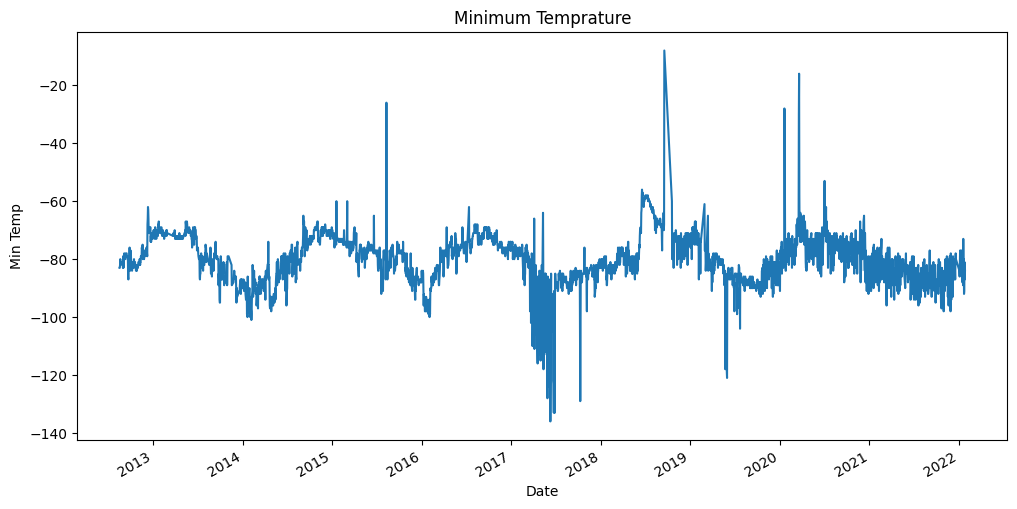

In [ ]:
mars_df["min_air_temp(°C)"].plot(figsize=(12, 6))
plt.title("Minimum Temprature")
plt.xlabel("Date")
plt.ylabel("Min Temp")
plt.show()

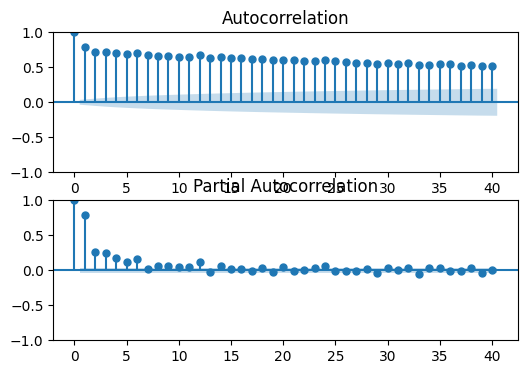

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
plot_acf(mars_df["min_air_temp(°C)"], lags=40, ax=ax1)
plot_pacf(mars_df["min_air_temp(°C)"], lags=40, ax=ax2)
plt.show()

In [ ]:
# min temp
order = (18, 2, 3)
model = ARIMA(mars_df["min_air_temp(°C)"], order=order)
results_min = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
# max temp
order = (18, 2, 3)
model = ARIMA(mars_df["max_air_temp(°C)"], order=order)
results_max = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
# pressure
order = (18, 2, 3)
model = ARIMA(mars_df["mean_pressure(Pa)"], order=order)
results_pp = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
forecast_steps = 52  # Change this to the number of steps you want to forecast

forecast_min = results_min.get_forecast(steps=forecast_steps)
forecast_max = results_max.get_forecast(steps=forecast_steps)
forecast_pp = results_pp.get_forecast(steps=forecast_steps)

forecast_values_min = forecast_min.predicted_mean
forecast_values_max = forecast_max.predicted_mean
forecast_values_pp = forecast_pp.predicted_mean


#print(type(forecast_values))

#for date, values in forecast_values.items():
#    print(date, values)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
start_date = "2022-01-27"
date_range = pd.date_range(start=start_date, periods=len(forecast_values_min))

forecast_values_min.index = date_range
forecast_values_max.index = date_range
forecast_values_pp.index = date_range

In [ ]:
display(forecast_values_min)

2022-01-27   -84.501664
2022-01-28   -85.271571
2022-01-29   -84.974124
2022-01-30   -85.217774
2022-01-31   -83.703278
2022-02-01   -85.331370
2022-02-02   -83.606080
2022-02-03   -85.583670
2022-02-04   -84.632742
2022-02-05   -84.657306
2022-02-06   -84.949821
2022-02-07   -85.108472
2022-02-08   -84.771479
2022-02-09   -84.905282
2022-02-10   -85.126772
2022-02-11   -84.489038
2022-02-12   -85.156459
2022-02-13   -84.730911
2022-02-14   -84.707015
2022-02-15   -85.159251
2022-02-16   -84.436126
2022-02-17   -85.202969
2022-02-18   -84.556502
2022-02-19   -85.008796
2022-02-20   -84.885174
2022-02-21   -84.661639
2022-02-22   -85.177462
2022-02-23   -84.556441
2022-02-24   -85.056581
2022-02-25   -84.865381
2022-02-26   -84.682270
2022-02-27   -85.156753
2022-02-28   -84.570665
2022-03-01   -85.060928
2022-03-02   -84.818244
2022-03-03   -84.763879
2022-03-04   -85.070345
2022-03-05   -84.641741
2022-03-06   -85.039230
2022-03-07   -84.818221
2022-03-08   -84.793103
2022-03-09   -85

In [ ]:
# creating a csv for predicted mars
mars_predicted_df = pd.DataFrame({"earth_date_time": forecast_values_min.index, "max_temp (C)": forecast_values_max.values})
mars_predicted_df["min_temp (C)"] = forecast_values_min.values
mars_predicted_df["pressure (Pa)"] = forecast_values_pp.values
display(mars_predicted_df)

,earth_date_time,max_temp (C),min_temp (C),pressure (Pa)
0,2022-01-27,9.273391,-84.501664,707.779816
1,2022-01-28,9.081166,-85.271571,707.911355
2,2022-01-29,9.078997,-84.974124,708.515281
3,2022-01-30,9.022999,-85.217774,708.536516
4,2022-01-31,9.013321,-83.703278,708.725435
5,2022-02-01,9.045576,-85.331370,708.870098
6,2022-02-02,8.996555,-83.606080,708.953499
7,2022-02-03,9.064816,-85.583670,709.278641
8,2022-02-04,9.027712,-84.632742,709.531262
9,2022-02-05,9.114786,-84.657306,709.741118


In [ ]:
mars_predicted_df.to_csv("mars_predicted.csv", index=False)

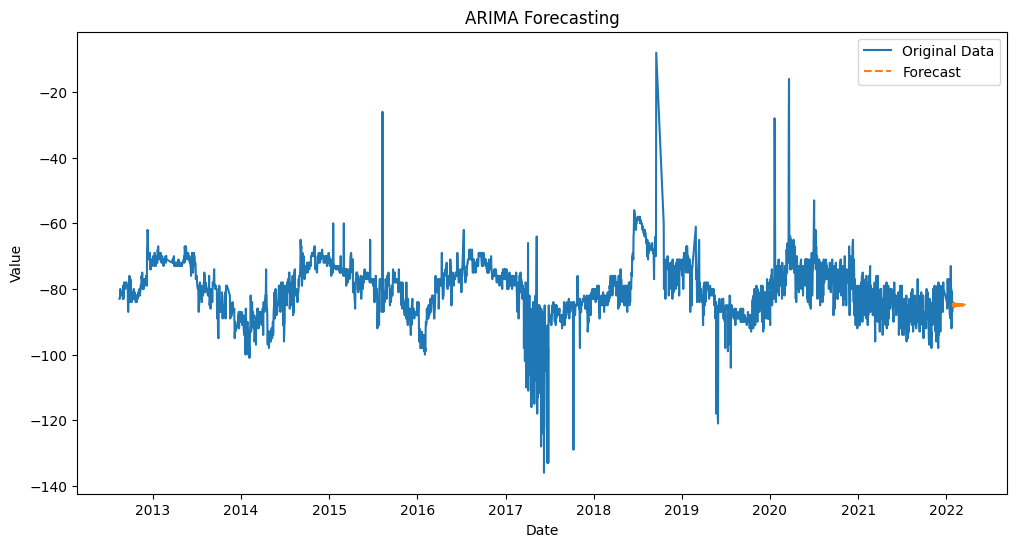

In [ ]:
# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(mars_df.index, mars_df["min_air_temp(°C)"], label="Original Data")
plt.plot(pd.date_range(start=mars_df.index[-1], periods=forecast_steps + 1, freq="D")[1:], forecast_values_min, label="Forecast", linestyle="dashed")
plt.title("ARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Training on Earth data

In [ ]:
earth_df = pd.read_csv("earth_dataset.csv")

In [ ]:
display(earth_df)

,DATE,T_max (C),T_min (C),PP (hPa)
0,1960-01-02,10.6,3.9,1005.1
1,1960-01-03,12.2,6.1,1016.6
2,1960-01-07,5.0,-1.7,1029.3
3,1960-01-08,2.2,-1.7,1024.1
4,1960-01-09,3.9,0.0,1026.8
...,...,...,...,...
21673,2023-11-25,9.9,-0.4,1021.7
21674,2023-11-26,10.0,-1.3,1015.3
21675,2023-11-27,8.0,0.8,1000.7
21676,2023-11-28,7.6,3.7,1009.4


In [ ]:
earth_df["DATE"] = pd.to_datetime(earth_df["DATE"])
earth_df.set_index("DATE", inplace=True)

In [ ]:
print(earth_df.isna().sum())
print(earth_df.shape)

T_max (C)    0
T_min (C)    0
PP (hPa)     0
dtype: int64
(21678, 3)


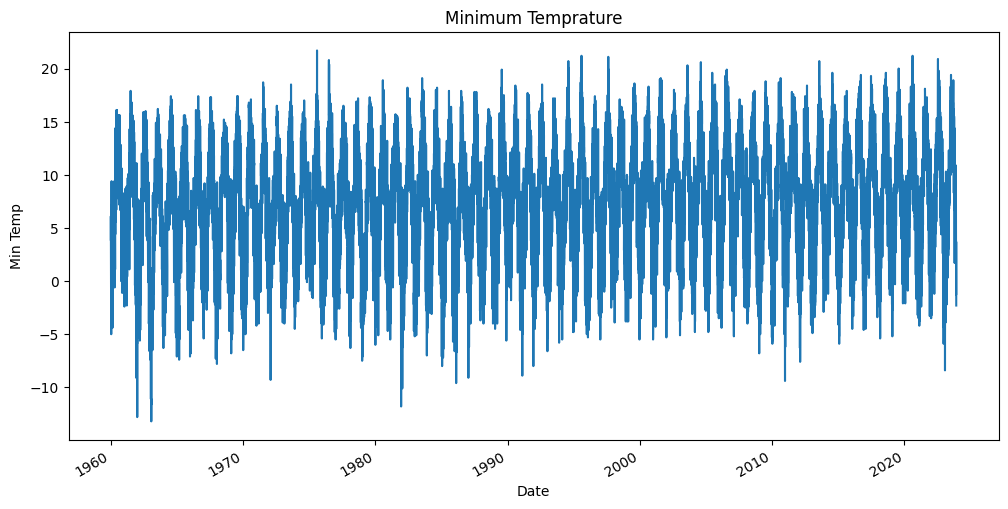

In [ ]:
earth_df["T_min (C)"].plot(figsize=(12, 6))
plt.title("Minimum Temprature")
plt.xlabel("Date")
plt.ylabel("Min Temp")
plt.show()

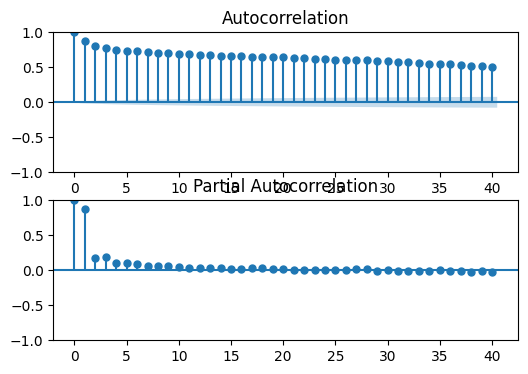

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
plot_acf(earth_df["T_min (C)"], lags=40, ax=ax1)
plot_pacf(earth_df["T_min (C)"], lags=40, ax=ax2)
plt.show()

In [ ]:
# min temp
order = (18, 2, 3)
model = ARIMA(earth_df["T_min (C)"], order=order)
results_min = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
# max temp
order = (18, 2, 3)
model = ARIMA(earth_df["T_max (C)"], order=order)
results_max = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
# pressure
order = (18, 2, 3)
model = ARIMA(earth_df["PP (hPa)"], order=order)
results_pp = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
forecast_steps = 52  # Change this to the number of steps you want to forecast

forecast_min = results_min.get_forecast(steps=forecast_steps)
forecast_max = results_max.get_forecast(steps=forecast_steps)
forecast_pp = results_pp.get_forecast(steps=forecast_steps)

forecast_values_min = forecast_min.predicted_mean
forecast_values_max = forecast_max.predicted_mean
forecast_values_pp = forecast_pp.predicted_mean


#print(type(forecast_values))

#for date, values in forecast_values.items():
#    print(date, values)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
start_date = "2023-12-01"
date_range = pd.date_range(start=start_date, periods=len(forecast_values_min))

forecast_values_min.index = date_range
forecast_values_max.index = date_range
forecast_values_pp.index = date_range

In [ ]:
display(forecast_values_min)

2023-12-01   -0.140681
2023-12-02    1.221187
2023-12-03    1.628804
2023-12-04    1.806545
2023-12-05    2.085926
2023-12-06    2.291652
2023-12-07    2.252429
2023-12-08    2.256269
2023-12-09    2.204503
2023-12-10    2.288350
2023-12-11    2.312890
2023-12-12    2.210744
2023-12-13    2.057406
2023-12-14    1.814329
2023-12-15    1.846410
2023-12-16    1.916981
2023-12-17    1.822542
2023-12-18    1.784864
2023-12-19    1.828031
2023-12-20    1.912778
2023-12-21    1.875114
2023-12-22    1.955038
2023-12-23    1.938018
2023-12-24    1.946959
2023-12-25    1.980993
2023-12-26    1.934702
2023-12-27    1.982580
2023-12-28    1.948169
2023-12-29    1.954774
2023-12-30    1.961888
2023-12-31    1.918524
2024-01-01    1.949833
2024-01-02    1.917679
2024-01-03    1.931989
2024-01-04    1.931325
2024-01-05    1.911773
2024-01-06    1.943533
2024-01-07    1.915700
2024-01-08    1.936222
2024-01-09    1.933684
2024-01-10    1.922800
2024-01-11    1.944647
2024-01-12    1.921085
2024-01-13 

In [ ]:
# creating a csv for predicted mars
earth_predicted_df = pd.DataFrame({"DATE": forecast_values_min.index, "T_max (C)": forecast_values_max.values})
earth_predicted_df["T_min (C)"] = forecast_values_min.values
earth_predicted_df["PP (hPa)"] = forecast_values_pp.values
display(earth_predicted_df)

,DATE,T_max (C),T_min (C),PP (hPa)
0,2023-12-01,5.842392,-0.140681,1002.038938
1,2023-12-02,7.076808,1.221187,1003.680707
2,2023-12-03,7.825512,1.628804,1004.312498
3,2023-12-04,8.549321,1.806545,1005.754785
4,2023-12-05,8.752883,2.085926,1006.526927
5,2023-12-06,8.883468,2.291652,1006.899621
6,2023-12-07,8.929996,2.252429,1007.271927
7,2023-12-08,9.037907,2.256269,1008.062469
8,2023-12-09,9.151732,2.204503,1009.246874
9,2023-12-10,9.030098,2.288350,1009.666000


In [ ]:
earth_predicted_df.to_csv("earth_predicted.csv", index=False)

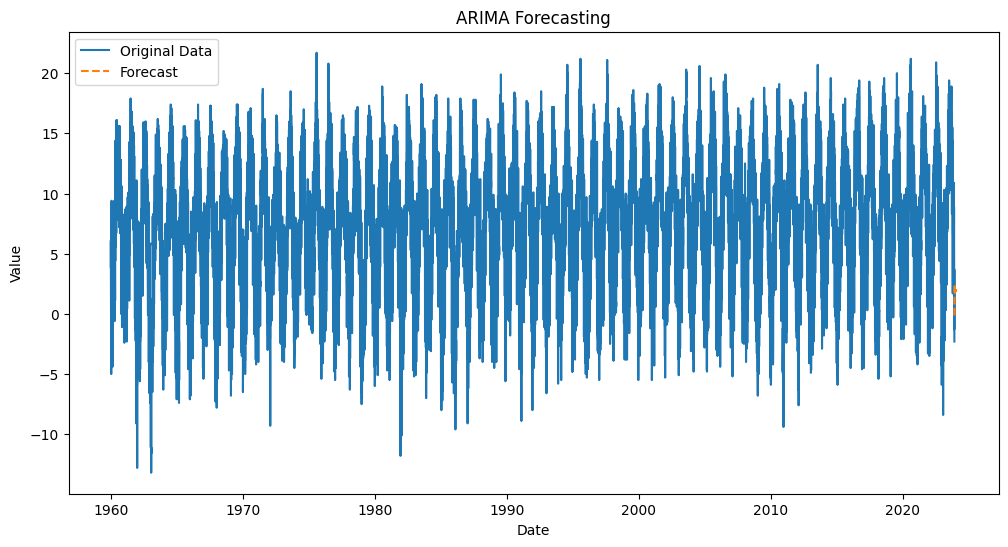

In [ ]:
# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(earth_df.index, earth_df["T_min (C)"], label="Original Data")
plt.plot(pd.date_range(start=earth_df.index[-1], periods=forecast_steps + 1, freq="D")[1:], forecast_values_min, label="Forecast", linestyle="dashed")
plt.title("ARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Visualization

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
earth_df = pd.read_csv("https://media.githubusercontent.com/media/dead96pool/datasets/main/poai_taba/earth_dataset.csv")
mars_df = pd.read_csv("https://media.githubusercontent.com/media/dead96pool/datasets/main/poai_taba/mars_dataset.csv")
earth_predicted = pd.read_csv("https://media.githubusercontent.com/media/dead96pool/datasets/main/poai_taba/earth_predicted.csv")
mars_predicted = pd.read_csv("https://media.githubusercontent.com/media/dead96pool/datasets/main/poai_taba/mars_predicted.csv")

earth_df["DATE"] = pd.to_datetime(earth_df["DATE"])
mars_df["earth_date_time"] = pd.to_datetime(mars_df["earth_date_time"])




<ipython-input-7-4e503a55fb7d>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(earth_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
<ipython-input-7-4e503a55fb7d>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mars_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


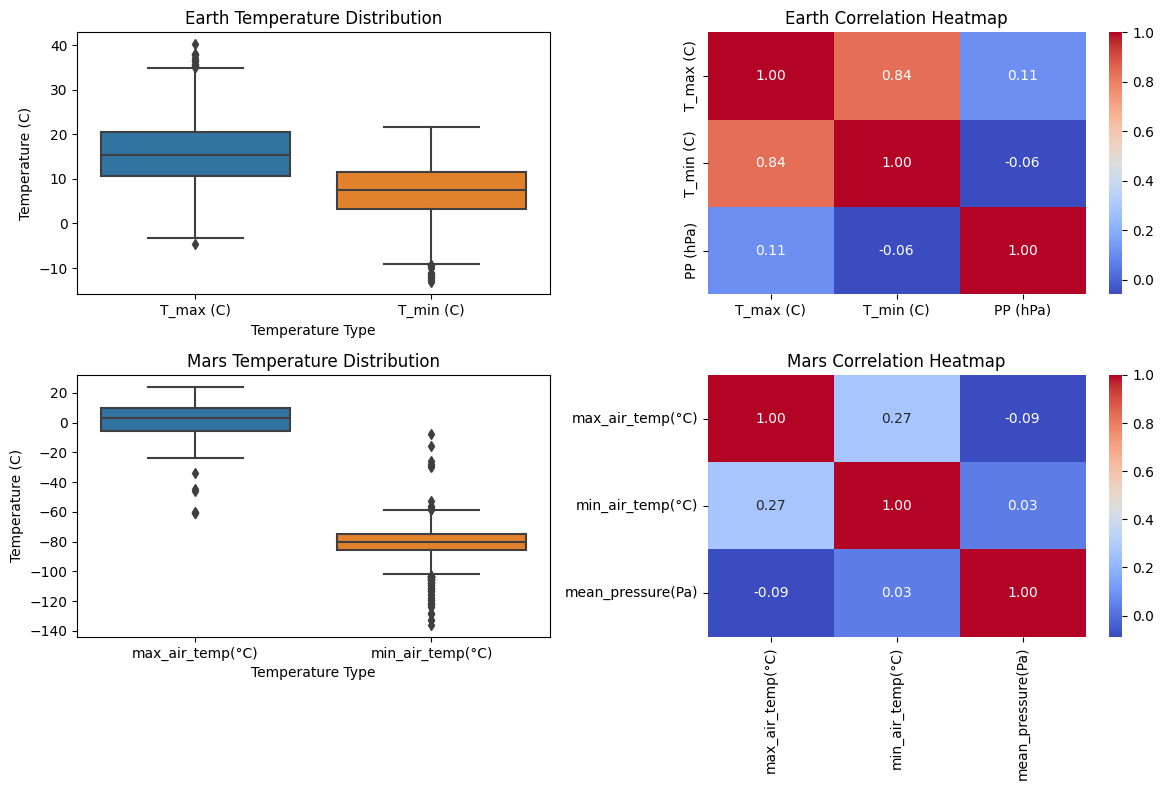

In [ ]:
# Earth Visualizations
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=earth_df[["T_max (C)", "T_min (C)"]])
plt.title("Earth Temperature Distribution")
plt.xlabel("Temperature Type")
plt.ylabel("Temperature (C)")

plt.subplot(2, 2, 2)
sns.heatmap(earth_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Earth Correlation Heatmap")

plt.subplot(2, 2, 3)
sns.boxplot(data=mars_df[["max_air_temp(°C)", "min_air_temp(°C)"]])
plt.title("Mars Temperature Distribution")
plt.xlabel("Temperature Type")
plt.ylabel("Temperature (C)")

plt.subplot(2, 2, 4)
sns.heatmap(mars_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mars Correlation Heatmap")

plt.tight_layout()
plt.show()



<ipython-input-13-84baa5a4ccf6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  earth_monthly_avg = earth_df.groupby('Month').mean().reset_index()


,DATE,T_max (C),T_min (C),PP (hPa),Month
0,1960-01-02,10.6,3.9,1005.1,1960-01
1,1960-01-03,12.2,6.1,1016.6,1960-01
2,1960-01-07,5.0,-1.7,1029.3,1960-01
3,1960-01-08,2.2,-1.7,1024.1,1960-01
4,1960-01-09,3.9,0.0,1026.8,1960-01
...,...,...,...,...,...
21673,2023-11-25,9.9,-0.4,1021.7,2023-11
21674,2023-11-26,10.0,-1.3,1015.3,2023-11
21675,2023-11-27,8.0,0.8,1000.7,2023-11
21676,2023-11-28,7.6,3.7,1009.4,2023-11


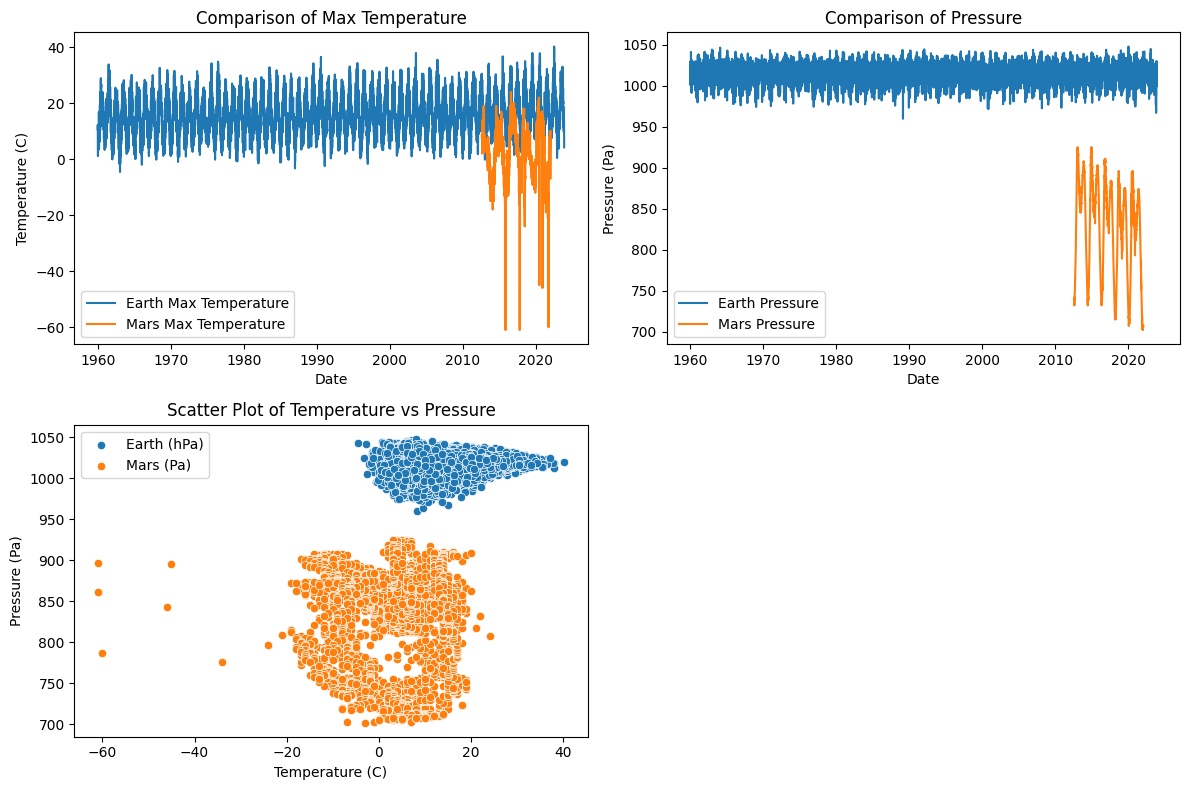

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.lineplot(x="DATE", y="T_max (C)", data=earth_df, label="Earth Max Temperature")
sns.lineplot(x="earth_date_time", y="max_air_temp(°C)", data=mars_df, label="Mars Max Temperature")
plt.title("Comparison of Max Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(x="DATE", y="PP (hPa)", data=earth_df, label="Earth Pressure")
sns.lineplot(x="earth_date_time", y="mean_pressure(Pa)", data=mars_df, label="Mars Pressure")
plt.title("Comparison of Pressure")
plt.xlabel("Date")
plt.ylabel("Pressure (Pa)")
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x="T_max (C)", y="PP (hPa)", data=earth_df, label="Earth (hPa)")
sns.scatterplot(x="max_air_temp(°C)", y="mean_pressure(Pa)", data=mars_df, label="Mars (Pa)")
plt.title("Scatter Plot of Temperature vs Pressure")
plt.xlabel("Temperature (C)")
plt.ylabel("Pressure (Pa)")
plt.legend()

plt.tight_layout()
plt.show()

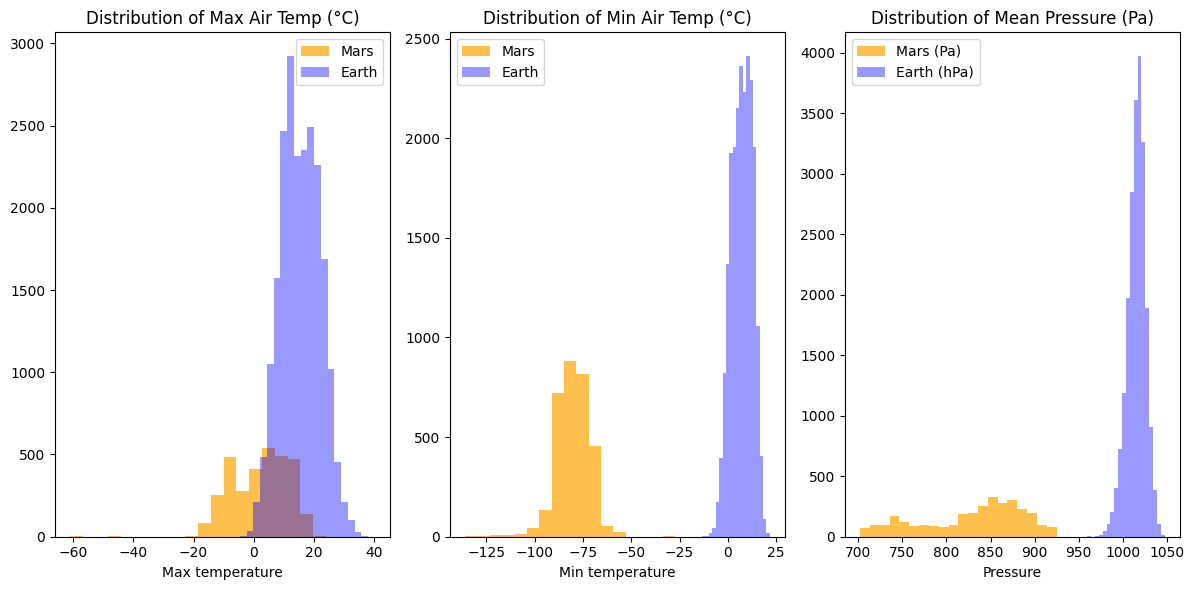

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(mars_df["max_air_temp(°C)"], bins=20, color="orange", alpha=0.7, label="Mars")
plt.title("Distribution of Max Air Temp (°C)")
plt.xlabel("Max temperature")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(mars_df["min_air_temp(°C)"], bins=20, color="orange", alpha=0.7, label="Mars")
plt.title("Distribution of Min Air Temp (°C)")
plt.xlabel("Min temperature")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(mars_df["mean_pressure(Pa)"], bins=20, color="orange", alpha=0.7, label="Mars (Pa)")
plt.title("Distribution of Mean Pressure (Pa)")
plt.xlabel("Pressure")
plt.legend()

plt.subplot(1, 3, 1)
plt.hist(earth_df["T_max (C)"], bins=20, color="blue", alpha=0.4, label="Earth")
plt.title("Distribution of Max Air Temp (°C)")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(earth_df["T_min (C)"], bins=20, color="blue", alpha=0.4, label="Earth")
plt.title("Distribution of Min Air Temp (°C)")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(earth_df["PP (hPa)"], bins=20, color="blue", alpha=0.4, label="Earth (hPa)")
plt.title("Distribution of Mean Pressure (Pa)")
plt.legend()

plt.tight_layout()
plt.show()

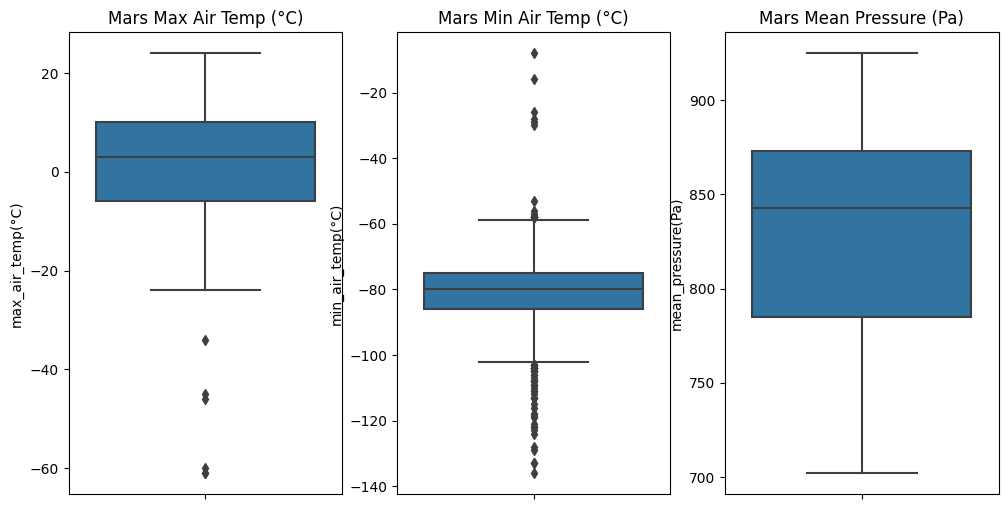

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=mars_df["max_air_temp(°C)"])
plt.title("Mars Max Air Temp (°C)")

plt.subplot(1, 3, 2)
sns.boxplot(y=mars_df["min_air_temp(°C)"])
plt.title("Mars Min Air Temp (°C)")

plt.subplot(1, 3, 3)
sns.boxplot(y=mars_df["mean_pressure(Pa)"])
plt.title("Mars Mean Pressure (Pa)")

plt.show()